In [1]:
#  Simple DNN LMP prediction as benchmark
#  by Vasudharini Sridharan
#  Website: https://rpglab.github.io/

import numpy as np
import datetime
start=datetime.datetime.now()
print(start)

2020-09-22 00:16:19.009558


In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\vsridha4\Desktop\RA\Linear


In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
load = pd.read_csv(os.path.join(cwd,'dataset_train_4_0to200.csv'))

In [4]:
load.head

<bound method NDFrame.head of        Delivery Date  Delivery Hour  Delivery Interval Repeated Hour Flag  \
0           1/1/2015              1                  1                  N   
1           1/1/2015              1                  2                  N   
2           1/1/2015              1                  3                  N   
3           1/1/2015              1                  4                  N   
4           1/1/2015              2                  1                  N   
...              ...            ...                ...                ...   
134159    12/31/2019             23                  4                  N   
134160    12/31/2019             24                  1                  N   
134161    12/31/2019             24                  2                  N   
134162    12/31/2019             24                  3                  N   
134163    12/31/2019             24                  4                  N   

       Settlement Point Name Settlement Point

In [5]:
import datetime
load['year'] = pd.DatetimeIndex(load['Delivery Date']).year
load['month'] = pd.DatetimeIndex(load['Delivery Date']).month
load['day'] = pd.DatetimeIndex(load['Delivery Date']).day
load['year'].dtype

dtype('int64')

In [6]:
a = load['Delivery Date']
a= pd.to_datetime(a)

In [7]:
load['dayofweek'] = a.dt.dayofweek
load['dayofweek']

0         3
1         3
2         3
3         3
4         3
         ..
134159    1
134160    1
134161    1
134162    1
134163    1
Name: dayofweek, Length: 134164, dtype: int64

In [8]:
load.dtypes

Delivery Date             object
Delivery Hour              int64
Delivery Interval          int64
Repeated Hour Flag        object
Settlement Point Name     object
Settlement Point Type     object
DayStatus                 object
Temperature in F           int64
Load in Houston            int64
Ercot Load                 int64
Settlement Point Price     int64
year                       int64
month                      int64
day                        int64
dayofweek                  int64
dtype: object

In [9]:

# Removing unnecessary columns 
load = load.drop(columns=['Delivery Date','day','Settlement Point Name','Settlement Point Type'])  

# Re-arranging Columns
load = load[['year','month','dayofweek','Delivery Hour','Delivery Interval','Repeated Hour Flag','DayStatus','Temperature in F',
                       'Load in Houston', 'Ercot Load','Settlement Point Price']]
load.head()

,year,month,dayofweek,Delivery Hour,Delivery Interval,Repeated Hour Flag,DayStatus,Temperature in F,Load in Houston,Ercot Load,Settlement Point Price
0,2015,1,3,1,1,N,Public Holiday,44,9844,39625,23
1,2015,1,3,1,2,N,Public Holiday,44,9844,39625,23
2,2015,1,3,1,3,N,Public Holiday,44,9844,39625,22
3,2015,1,3,1,4,N,Public Holiday,44,9844,39625,22
4,2015,1,3,2,1,N,Public Holiday,44,9653,39014,22


In [10]:
# Replacing 'N' and 'Y' with '0' and '1' respectively in column "Repeated Hour Flag"
load = load.rename(columns={"Repeated Hour Flag": "Flag"})
flag = {'N': 0,'Y': 1}  # dictionary
load.Flag = [flag[item] for item in load.Flag]
load.head()


,year,month,dayofweek,Delivery Hour,Delivery Interval,Flag,DayStatus,Temperature in F,Load in Houston,Ercot Load,Settlement Point Price
0,2015,1,3,1,1,0,Public Holiday,44,9844,39625,23
1,2015,1,3,1,2,0,Public Holiday,44,9844,39625,23
2,2015,1,3,1,3,0,Public Holiday,44,9844,39625,22
3,2015,1,3,1,4,0,Public Holiday,44,9844,39625,22
4,2015,1,3,2,1,0,Public Holiday,44,9653,39014,22


In [11]:
daystatus = {'Public Holiday': 2, 'Weekday': 0, 'Weekend': 1}   # dictionary
load.DayStatus = [daystatus[item] for item in load.DayStatus]
load.head()

,year,month,dayofweek,Delivery Hour,Delivery Interval,Flag,DayStatus,Temperature in F,Load in Houston,Ercot Load,Settlement Point Price
0,2015,1,3,1,1,0,2,44,9844,39625,23
1,2015,1,3,1,2,0,2,44,9844,39625,23
2,2015,1,3,1,3,0,2,44,9844,39625,22
3,2015,1,3,1,4,0,2,44,9844,39625,22
4,2015,1,3,2,1,0,2,44,9653,39014,22


In [12]:
# Removing "," from columns "Load in Houston" , "Ercot Load" and "Settlement Point Price"
#load['Load in Houston'] = load['Load in Houston'].astype(str).replace(r',', '')
#load['Ercot Load'] = load['Ercot Load'].astype(str).replace(r',', '')
load['Settlement Point Price'] = load['Settlement Point Price'].astype(str).replace(r',', '')
load.head()


,year,month,dayofweek,Delivery Hour,Delivery Interval,Flag,DayStatus,Temperature in F,Load in Houston,Ercot Load,Settlement Point Price
0,2015,1,3,1,1,0,2,44,9844,39625,23
1,2015,1,3,1,2,0,2,44,9844,39625,23
2,2015,1,3,1,3,0,2,44,9844,39625,22
3,2015,1,3,1,4,0,2,44,9844,39625,22
4,2015,1,3,2,1,0,2,44,9653,39014,22


In [13]:
load['Settlement Point Price'] = load['Settlement Point Price'].astype(float)
load['Temperature in F'] = load['Temperature in F'].astype(float)
#load['Load in Houston'] = load['Load in Houston'].astype(float)
#load['Ercot Load'] = load['Ercot Load'].astype(float)
load.dtypes

year                        int64
month                       int64
dayofweek                   int64
Delivery Hour               int64
Delivery Interval           int64
Flag                        int64
DayStatus                   int64
Temperature in F          float64
Load in Houston             int64
Ercot Load                  int64
Settlement Point Price    float64
dtype: object

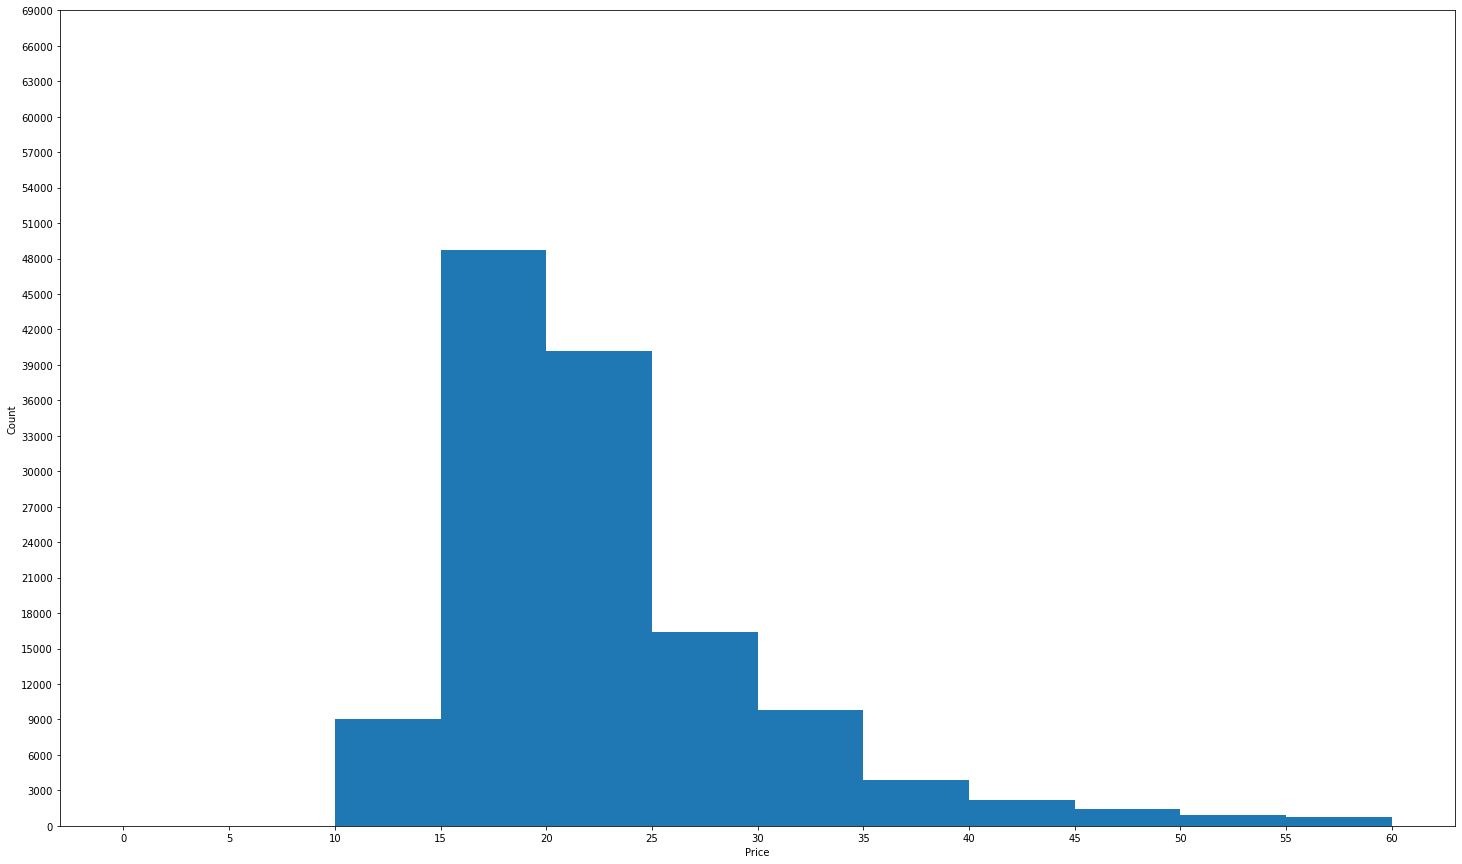

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
plt.hist(load['Settlement Point Price'], bins = (0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.xticks(np.arange(0,61,5))
plt.yticks(np.arange(0,70000,3000))
plt.xlabel("Price")
_ = plt.ylabel("Count")

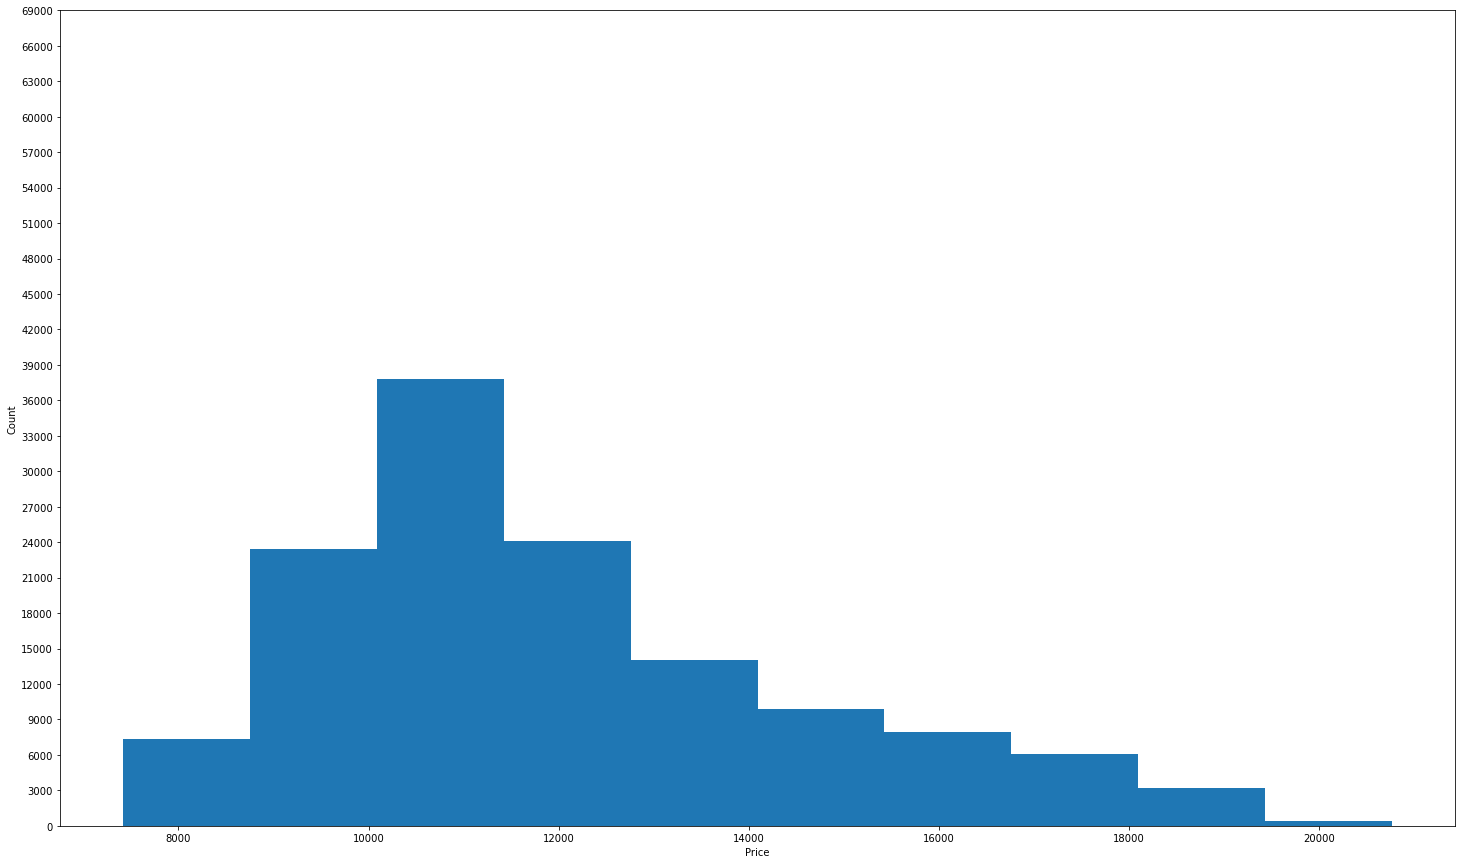

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
plt.hist(load['Load in Houston'])
#plt.xticks(np.arange(0,61,5))
plt.yticks(np.arange(0,70000,3000))
plt.xlabel("Price")
_ = plt.ylabel("Count")

In [16]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
def norm(x):
    ct = make_column_transformer((OneHotEncoder(sparse=False),make_column_selector(pattern = 'year')),
                                 (OneHotEncoder(sparse=False),make_column_selector(pattern = 'month')),
                             (OneHotEncoder(sparse=False),make_column_selector(pattern = 'dayofweek')),
                             (OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Hour')),
                             (OneHotEncoder(sparse=False),make_column_selector(pattern = 'Delivery Interval')),
                             (OneHotEncoder(sparse=False),make_column_selector(pattern = 'Flag')),
                             (OneHotEncoder(sparse=False),make_column_selector(pattern = 'DayStatus')),
                             (QuantileTransformer(copy=True), make_column_selector(pattern = 'Temperature in F')),
                             (QuantileTransformer(copy=True), make_column_selector(pattern = 'Load in Houston')),
                             (QuantileTransformer(copy=True), make_column_selector(pattern = 'Ercot Load')),
                                remainder = 'passthrough')
                             #((copy=True), make_column_selector(pattern = 'Settlement Point Price')))
    normed_data = ct.fit_transform(x)
    return(normed_data) 

In [17]:
normed_data = norm(load)
normed_data

array([[ 1.        ,  0.        ,  0.        , ...,  0.18678679,
         0.50280725, 23.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.18678679,
         0.50280725, 23.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.18678679,
         0.50280725, 22.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.21696697,
         0.37517518, 12.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.21696697,
         0.37517518, 13.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.21696697,
         0.37517518, 12.        ]])

In [18]:
from sklearn.model_selection import train_test_split

# splitting dataset into 'training dataset' and 'validation and test dataset'
Train, Test = train_test_split(normed_data, test_size=0.1, shuffle = False)

print(Train.shape, Test.shape)

(120747, 61) (13417, 61)


In [19]:
Test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.98898899,  0.88388388,  0.89965565,
       21.        ])

In [20]:
train_labels = Train[:,(Train.shape[1]-1)]

In [21]:
test_labels = Test[:,(Test.shape[1]-1)]

In [22]:
print(train_labels.shape, test_labels.shape)

(120747,) (13417,)


In [23]:
train_labels

array([23., 23., 22., ..., 24., 22., 22.])

In [24]:
test_labels

array([21., 20., 19., ..., 12., 13., 12.])

In [25]:
Xtrain = Train[:,0:(Train.shape[1]-1)]
Xtrain[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.06606607, 0.18678679, 0.50280725])

In [26]:
Xtest = Test[:,0:(Test.shape[1]-1)]
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.98898899, 0.88388388, 0.89965565])

In [27]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


In [28]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[Xtrain.shape[1],]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

In [29]:
optimizer = optimizers.Adam()

In [30]:
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3904      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________


In [32]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [33]:
example_batch= Xtrain[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.1346207 ],
       [ 0.09943003],
       [ 0.00427875],
       [-0.00610352],
       [-0.10773894],
       [ 0.21247992],
       [ 0.06694272],
       [ 0.11002951],
       [-0.20964174],
       [ 0.17412716]], dtype=float32)

In [34]:
import datetime
print(datetime.datetime.now())

2020-09-22 00:17:06.108671


In [35]:
EPOCHS = 1000

history = model.fit(
  Xtrain, train_labels,
  epochs=EPOCHS, validation_split=0.1, shuffle = False, verbose=1, 
    callbacks=[early_stop])

Train on 108672 samples, validate on 12075 samples
Epoch 1/1000
108672/108672 [==============================] - 7s 67us/sample - loss: 43.8804 - mae: 4.1864 - mse: 43.8804 - val_loss: 65.0758 - val_mae: 6.3270 - val_mse: 65.0758
Epoch 2/1000
108672/108672 [==============================] - 7s 65us/sample - loss: 35.2329 - mae: 3.7248 - mse: 35.2329 - val_loss: 62.3889 - val_mae: 6.2985 - val_mse: 62.3889
Epoch 3/1000
108672/108672 [==============================] - 7s 68us/sample - loss: 34.1276 - mae: 3.6519 - mse: 34.1276 - val_loss: 73.6451 - val_mae: 7.0470 - val_mse: 73.6451
Epoch 4/1000
108672/108672 [==============================] - 7s 66us/sample - loss: 33.4985 - mae: 3.6040 - mse: 33.4985 - val_loss: 84.3758 - val_mae: 7.6113 - val_mse: 84.3758
Epoch 5/1000
108672/108672 [==============================] - 7s 68us/sample - loss: 32.9649 - mae: 3.5599 - mse: 32.9649 - val_loss: 85.3205 - val_mae: 7.6625 - val_mse: 85.3204
Epoch 6/1000
108672/108672 [==========================

In [36]:
import datetime
c=datetime.datetime.now()
print(c)

2020-09-22 00:17:56.920515


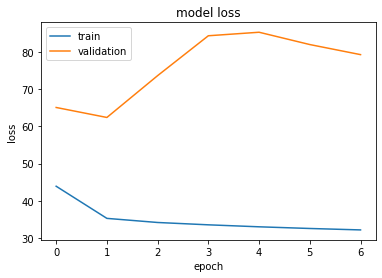

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

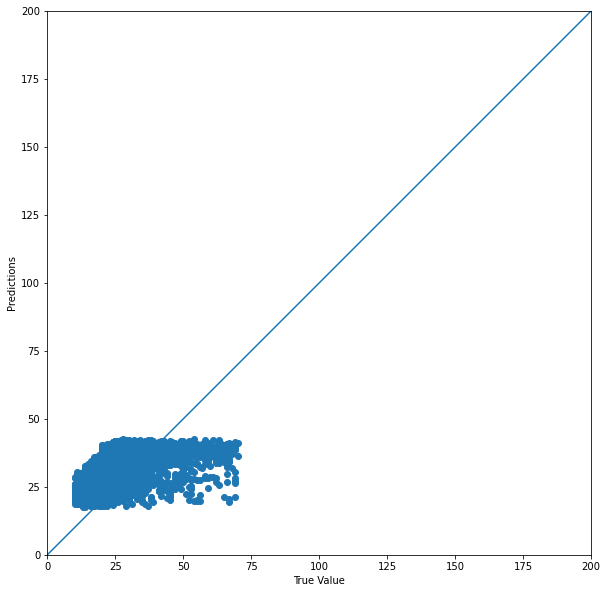

In [38]:
test_predictions = model.predict(Xtest).flatten()
plt.figure(figsize=(15,10))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Value')
plt.ylabel('Predictions')
lims = [0,200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [39]:
import numpy as np
a= Xtest[0, 0:Xtest.shape[1]]
b= test_labels[0]
a.shape
a = np.reshape(a, (1,Xtest.shape[1]))
test_prediction = model.predict(a)
print(a, b, test_prediction)

[[0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  1.         0.         0.         0.         1.         0.
  1.         0.         0.         0.98898899 0.88388388 0.89965565]] 21.0 [[28.927185]]


[28.927189 28.363907 27.54639  ... 22.325432 21.893166 21.475372] [21. 20. 19. ... 12. 13. 12.] [ 7.92718887  8.36390686  8.54639053 ... 10.32543182  8.89316559
  9.47537231]


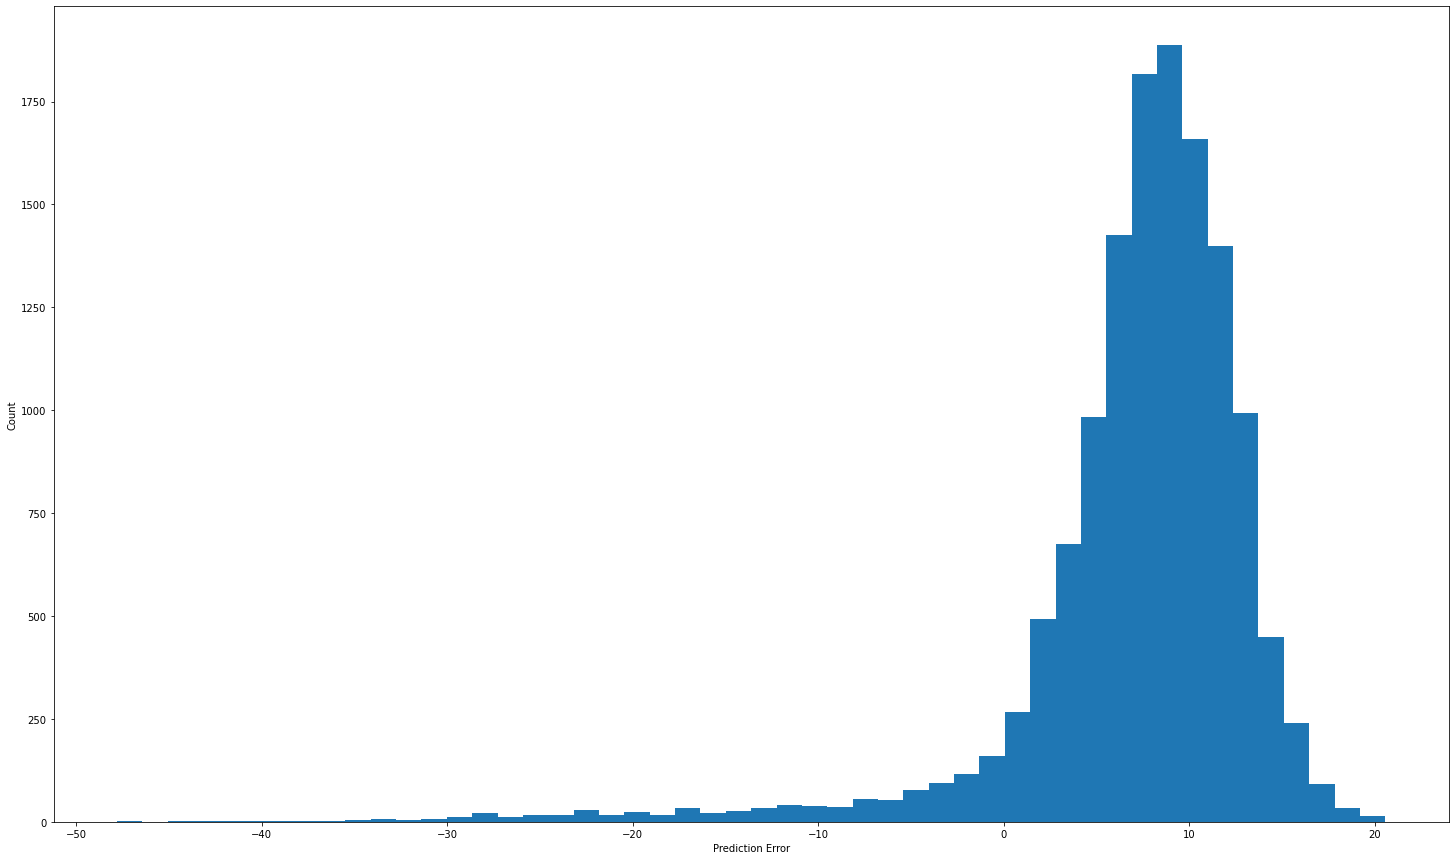

In [40]:
error = test_predictions - test_labels
plt.figure(figsize=(25,15))
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
print(test_predictions, test_labels, error)

In [41]:
i=0
count=0
for i in range(len(error)):
    if ((error[i])>10) or ((error[i]<-10)):
        count=count+1
print(count)

4815


In [42]:
a = len(test_predictions) - count
a
accuracy = (a/len(test_predictions))*100
print('accuracy:', accuracy)

accuracy: 64.1126928523515


In [43]:
from statistics import mean, stdev
print('Mean of error in test data:', mean(error))
print('Standard deviation of error in test data:', stdev(error))

Mean of error in test data: 7.24869654691636
Standard deviation of error in test data: 6.464535691494438


In [44]:
from statistics import mean, stdev
print('Mean of test data:', mean(test_labels))
print('Standard deviation of test data:', stdev(test_labels))

Mean of test data: 20.905343966609525
Standard deviation of test data: 8.246797804833701


In [45]:
import datetime
stop=datetime.datetime.now()
print(stop)

2020-09-22 00:17:57.968712


In [46]:
print(stop-start)

0:01:38.959154


In [47]:
j=1
for j in range(1,11):
    i=0
    count=0
    for i in range(len(error)):
        if ((error[i])>j) or ((error[i]<-j)):
            count=count+1
    a = len(test_predictions) - count
    accuracy = (a/len(test_predictions))*100
    print('accuracy: for threshold of %i'%j,'$: %.2f'%accuracy)

accuracy: for threshold of 1 $: 2.12
accuracy: for threshold of 2 $: 5.02
accuracy: for threshold of 3 $: 8.67
accuracy: for threshold of 4 $: 12.82
accuracy: for threshold of 5 $: 17.83
accuracy: for threshold of 6 $: 24.83
accuracy: for threshold of 7 $: 33.34
accuracy: for threshold of 8 $: 43.35
accuracy: for threshold of 9 $: 53.80
accuracy: for threshold of 10 $: 64.11
